# Titanic Survival Prediction

## Importing Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import metrics
# ML Algorithms
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier


## Adding Dataframes

In [33]:
df_train=pd.read_csv("./train.csv") #load train data
df_test=pd.read_csv("./test.csv") #load train data
df_train.shape
df_test.shape
train = df_train.copy() # make train data copies
test = df_test.copy() # make test data copies
trainCopy = df_train.copy() # make train data copies
testCopy = df_test.copy() # make test data copies

## Data Exploration/Analysis

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [35]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Identify Missing Data

In [36]:
total = train.isnull().sum().sort_values(ascending=False)
percent1 = train.isnull().sum()/train.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending=False)
missingData = pd.concat([total, percent2], axis=1, keys=['Total', '%'])
missingData.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


## Identifying Visual Patterns

### Age,Sex vs Survival

/home/wishwa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/wishwa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/wishwa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/wishwa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


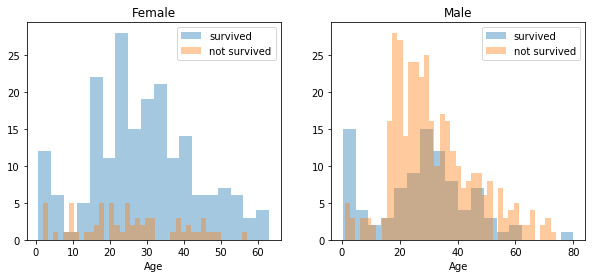

In [37]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

### Embarked, Pclass and Sex:

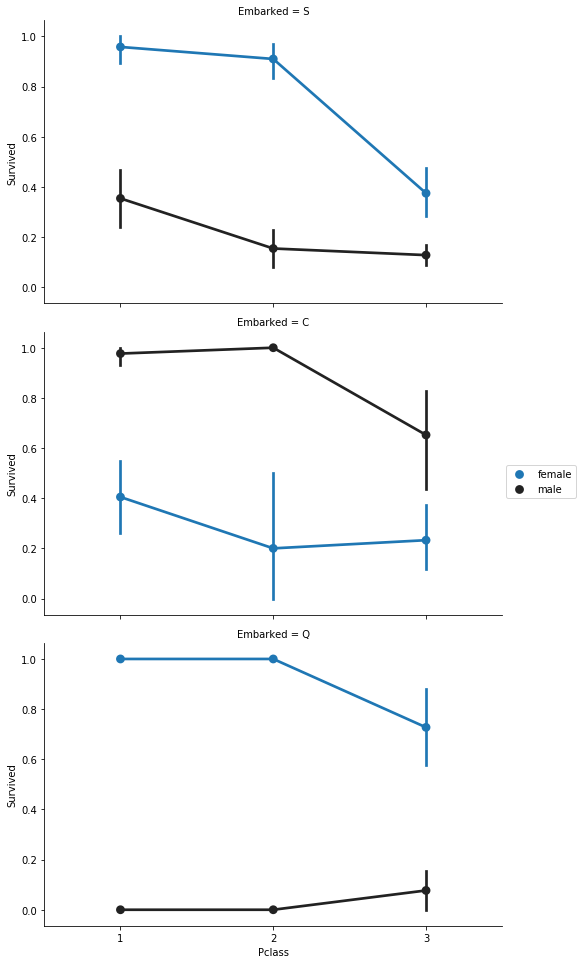

In [38]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

### Pclass

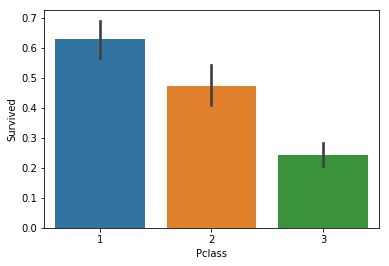

In [39]:
sns.barplot(x='Pclass', y='Survived', data=train)

### Sibsp,Parch and add relatives/not_alone columns 

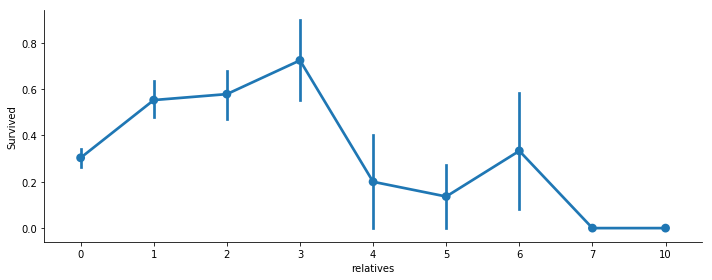

In [40]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )

## Data Preprocessing

### Remove Name/PassengerId Column 


In [41]:
del train['Name']
#del train['PassengerId']
del test['Name']
#del test['PassengerId']
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,1


### Interprit Cabin to Deck and Replace the feature

In [42]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

### Drop Cabin from both Datasets

In [43]:
del train['Cabin']
del test['Cabin']
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,0,3
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,1,8


## Missing Data

### Age (Replace NaN using Std & mean values)

In [44]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

### Embarked (Fill with most common value)

In [45]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

### Fare (Convert to int64)

In [46]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### Sex/Embarked (Convert to numeric)

In [47]:
gender_map={'male':1,'female':0}
train['Sex']=train['Sex'].map(gender_map)
test['Sex']=test['Sex'].map(gender_map)
embarked_map={'S':1,'C':2,'Q':3}
train['Embarked']=train['Embarked'].map(embarked_map)
test['Embarked']=test['Embarked'].map(embarked_map)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,1,0,3,1,22,1,0,A/5 21171,7,1,1,0,8
1,2,1,1,0,38,1,0,PC 17599,71,2,1,0,3
2,3,1,3,0,26,0,0,STON/O2. 3101282,7,1,0,1,8
3,4,1,1,0,35,1,0,113803,53,1,1,0,3
4,5,0,3,1,35,0,0,373450,8,1,0,1,8


### Ticket (Drop)

In [48]:
del train['Ticket']
del test['Ticket']

## Creating Categories

### Age

In [49]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,1,0,3,1,2,1,0,7,1,1,0,8
1,2,1,1,0,5,1,0,71,2,1,0,3
2,3,1,3,0,3,0,0,7,1,0,1,8
3,4,1,1,0,5,1,0,53,1,1,0,3
4,5,0,3,1,5,0,0,8,1,0,1,8


In [51]:
feature_col_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','relatives','not_alone','Deck']
predicted_class_name=['Survived']
X_train= train[feature_col_names].values #predictor feature columns (10 x m)
y_train=train[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)
X_test=test[feature_col_names].values #predictor feature columns (10 x m)

test['Survived'] = np.nan
test['Survived']=test['Survived'].fillna(0) 
test['Survived']=test['Survived'].astype(int)


#df_test_copy['Survived'] = nb_model.y_fitted
predicted_class_name=['Survived']
y_test=test[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Survived
0,892,3,1,2,0,0,7,3,0,1,8,0
1,893,3,0,5,1,0,7,1,1,0,8,0
2,894,2,1,3,0,0,9,3,0,1,8,0
3,895,3,1,5,0,0,8,1,0,1,8,0
4,896,3,0,5,1,1,12,1,2,0,8,0


## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_model = RandomForestClassifier(n_estimators= 1290)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
# training metrics
#print("Training data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

print('Model Performance')
#print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#print('Accuracy = {:0.2f}%.'.format(accuracy))

# training metrics
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))





Model Performance
Train data Accuracy: 0.9461
Test data Accuracy: 0.6268


## Random Forest came up with the accuracy of 82.54% for the TESTING DATA only with data preprocessing and Cross Validation

## Implementing Optimization

### Examine default RF to determine parameters

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_model = RandomForestClassifier(n_estimators= 1000,random_state=0)      # Create random forest object

rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

# training metrics
baccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(baccuracy))

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

Train data Accuracy: 0.9461
Test data Accuracy: 0.6316
{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 42)
param={'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator=rf, param_grid=random_grid,
                               scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2,  n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train.ravel());

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total= 

[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.2s


[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.4s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.2s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   2.7s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=1, m

[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=1, max_

[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=1, m

[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_de

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min


[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   3.9s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_fea

[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=1, ma

[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, m

[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.1s
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] bootstrap=True, 

[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.6s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_de

[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=1, ma

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min


[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_feat

[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.4s
[CV] bootstrap=True, max_depth=1, ma

[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.0s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=1, max_featur

[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_

[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.0s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   2.4s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_depth=1, ma

[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=1, ma

[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=1, max_feat

[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   3.1s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   3.1s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=1, m

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.8min


[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.5s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.0s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.0s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, m

[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.0s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=1, ma

[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] bootstrap=True, max_depth=1, ma

[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.4s
[CV] bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.4s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, m

[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=1, max_featur

[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, m

[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.4s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.4s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.3s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.4s
[CV] bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_fea

[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_featu

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   2.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=2, m

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.1min


[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, m

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_de

[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=2, ma

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=2, max_featu

[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   3.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=2, ma

[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.4s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=2, max_featur

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_fea

[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   2.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=2, ma

[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=2, 

[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=2, max_fe

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   2.7s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=2, m

[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=2, max_

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 13.1min


[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.7s
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, 

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_de

[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=2, max

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_feat

[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   3.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=2, ma

[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_feat

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, m

[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.0s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=2, ma

[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=2, ma

[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, m

[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=3, max_featur

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, m

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.4s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=3, max_fea

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 17.7min


[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, m

[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=3, max_featur

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, m

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=3, max_fea

[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_featur

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, m

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   3.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_fea

[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=3, ma

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=3, m

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=3, m

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   3.3s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.5s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_de

[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=3, ma

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=3, max_feat

[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=3, ma

[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] bootstrap=True, max_depth=3, max_featur

[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 23.2min


[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.4s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, m

[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=3, max

[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, ma

[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.1s
[CV] bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=4, m

[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_featu

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, m

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, max_featu

[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=4, ma

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.1s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, m

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, m

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.5s
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, m

[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=4, ma

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_fea

[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=4, ma

[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   2.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_

[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_featu

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=4, m

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 


[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 29.4min


[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=4, max_featu

[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=4, ma

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, m

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, m

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4,

[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=4, ma

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.0s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_feat

[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=4, ma

[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_f

[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   3.8s
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV] bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   3.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, m

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=5, max_fea

[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=5, ma

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=5, m

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   3.8s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=5, m

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_de

[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=5, ma

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.8s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, ma

[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_dep

[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 36.5min


[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_de

[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=5, ma

[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_s

[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.8s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=5, ma

[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_feat

[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=5, ma

[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=

[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=5, max_feat

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, m

[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=5, ma

[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=5, ma

[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   2.9s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.5s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=6, m

[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   3.8s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=6, max_featu

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.5s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, m

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.4s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   3.9s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_fea

[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.8s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=6, max_

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, m

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, m

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.7s
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_f

[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_depth=6, ma

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=6, max_fe

[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 44.5min


[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.4s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.8s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, m

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_featu

[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   3.8s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   3.8s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_fea

[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   2.9s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   2.9s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, m

[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.6s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.6s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=6,

[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=6, max_featu

[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.8s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.7s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.2s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.0s
[CV] bootstrap=True, max_depth=6, ma

[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=6, max_

[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=6, ma

[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.3s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.3s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.2s
[CV] bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=6, m

[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   1.0s
[CV] bootstrap=True, max_depth=6, max_featur

[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.2s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.6s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.6s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.6s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=6, m

[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.4s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.4s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   4.4s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=7, max_fea

[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   3.9s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   4.0s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   4.0s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   4.3s
[CV] bootstrap=True, max_depth=7, ma

[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.7s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, m

[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, m

[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.8s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   4.2s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   4.1s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=7,

[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.9s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.8s
[CV] bootstrap=True, max_depth=7, ma

[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_feat

[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   4.1s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=7, ma

[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.8s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_f

[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   4.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   4.1s
[CV] bootstrap=True, max_depth=7, max_feat

[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.3s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.2s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.2s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.2s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=7, m

[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.6s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_dep

[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 54.0min


[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.6s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, max_featu

[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   3.9s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   4.1s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   4.1s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   4.2s
[CV] bootstrap=True, max_depth=7, ma

[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.6s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   2.8s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, m

[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, m

[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   4.0s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   4.3s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   4.1s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, m

[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.9s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.8s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.8s
[CV] bootstrap=True, max_depth=7, ma

[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.6s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_fea

[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   4.2s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=7, ma

[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.9s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   3.1s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.2s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_

[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=7, max_featu

[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.2s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.1s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.1s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.1s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=7, m

[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   3.9s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, max_fea

[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.1s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   3.5s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   3.5s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   3.5s
[CV] bootstrap=True, max_depth=8, ma

[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, m

[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, m

[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.5s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.5s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.5s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.6s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_de

[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.7s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.6s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=8, ma

[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_featu

[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   4.2s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   4.3s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   4.2s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=8, ma

[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.8s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.9s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=8, max_featur

[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   4.6s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=8, max_feat

[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.3s
[CV] bootstrap=True, max_depth=8, ma

[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.6s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=8,

[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   4.3s
[CV] bootstrap=True, max_depth=8, max_feat

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.4s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=8, m

[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=8, max

[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 64.6min


[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   3.4s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=8, m

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   4.4s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, max_fea

[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   4.2s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   4.0s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.9s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   4.1s
[CV] bootstrap=True, max_depth=8, ma

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, m

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   4.4s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, m

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   4.0s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   4.2s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_de

[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.9s
[CV] bootstrap=True, max_depth=8, ma

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=8, max_featu

[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   4.1s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   4.3s
[CV] bootstrap=True, max_depth=8, ma

[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.9s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.9s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=9, max_featu

[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   4.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=9, max_feat

[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=9, ma

[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=

[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   3.8s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=9, max_feat

[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.2s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.1s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.8s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=9, m

[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=9, ma

[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   1.0s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   1.0s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   4.6s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   1.0s
[CV] bootstrap=True, max_depth=9, ma

[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.4s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.9s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.8s
[CV] bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.6s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=9, m

[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   1.0s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   4.6s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=9, max_featu

[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.9s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.9s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   4.1s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.9s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=9, m

[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.6s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.6s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.6s
[CV] bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.5s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, max_featu

[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   4.7s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   4.5s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   4.5s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=9, max_

[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.6s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   3.2s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, m

[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.5s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, m

[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   4.2s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_fea

[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.9s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   3.2s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=9, ma

[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_fe

[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   4.6s
[CV] bootstrap=True, max_depth=9, ma

[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 76.6min


[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   3.2s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   3.1s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_fea

[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=9, max_featur

[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   3.1s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.9s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.2s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=9, m

[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   4.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10,

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   4.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   1.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   3.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   3.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   4.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   4.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=10,

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   4.0s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   4.0s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   1.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   4.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=10

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   3.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   3.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   4.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   4.0s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_de

[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   4.0s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   3.8s
[CV] bootstrap=True,

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.9s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   4.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   4.2s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   4.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   3.0s
[CV] bootstrap=True,

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   4.5s
[CV] bootstrap=True, max_depth=10, 

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   3.2s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   3.1s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_d

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.3s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   4.4s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   3.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   3.6s
[CV] bootstrap=True,

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] bootstrap=False, max_dep

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   3.8s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=1, 

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.4s
[CV] bootstrap=False, max_de

[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 89.7min


[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.8s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_d

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.5s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.2s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.2s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.0s
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV] bootstrap=False, max_depth=1, m

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.2s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.4s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=1, m

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=False, max_depth

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   2.5s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.4s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   3.6s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=1,

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.7s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   2.0s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.8s
[CV] bootstrap=False, max_depth=1,

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.4s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.3s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.3s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   2.7s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   2.8s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_depth

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=1, m

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   3.0s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   2.8s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   3.0s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   2.8s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.6s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=False,

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=False, max_depth=1, m

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.0s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   2.8s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   2.9s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   3.3s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   2.0s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.7s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   4.0s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   3.1s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.6s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.6s
[CV] bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.7s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.7s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.5s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.9s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   4.6s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=2, 

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.8s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.8s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.8s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.6s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.7s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.6s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.6s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.6s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=2, m

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.8s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.7s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   4.0s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   4.0s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.7s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   2.9s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.4s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   4.0s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   4.6s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.6s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.8s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.9s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   3.1s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.4s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.4s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] bootstrap=False, max_depth=2, m

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   4.2s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.0s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.0s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.9s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.1s
[CV] bootstrap=False

[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 101.9min


[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.3s
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, 

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   3.7s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   4.0s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   4.0s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_dept

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.6s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   3.0s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   2.8s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_d

[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   4.0s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   4.3s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_dept

[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.9s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   3.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   3.0s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400, total=   2.9s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.6s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.8s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] bootstrap=False, max_depth=2, 

[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   4.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   3.0s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   3.1s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400, total=   2.9s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.3s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.8s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, total=   1.8s
[CV] bootstrap=False, max_depth=2

[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   4.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   4.4s
[CV] bootstrap=False, max_depth=2,

[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400, total=   3.3s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   3.4s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.6s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, total=   1.8s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.0s
[CV] bootstrap=False, 

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   4.8s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] bootstrap=False, max_depth=3,

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.5s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.6s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.4s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, total=   3.6s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.3s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.2s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   4.4s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   3.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   2.8s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800, total=   3.1s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.7s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.9s
[CV] bootstrap=False, max_depth=3, 

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.3s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.3s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800, total=   3.2s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=3,

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   3.4s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   3.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   3.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000, total=   3.7s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200, total=   2.1s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   4.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   4.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   4.5s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, ma

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.6s
[CV] bootstrap=False, max_depth=3, m

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.8s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.8s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.7s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.9s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=3, 

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=3, m

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   2.8s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   3.2s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.6s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.6s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   4.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.8s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.1s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_dept

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.7s
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.7s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   2.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   2.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   2.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   2.9s
[CV] bootstrap=False

[Parallel(n_jobs=-1)]: Done 11697 tasks      | elapsed: 115.2min


[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   3.6s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=4

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.8s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.8s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.8s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   3.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   3.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=Fals

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_dept

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.8s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=4,

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   2.8s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   3.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   3.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.6s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   2.0s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   4.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   4.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600, total=   3.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800, total=   3.6s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   2.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   2.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   2.0s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.9s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600, total=   3.0s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800, total=   3.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=Fals

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   4.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.9s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.9s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=4,

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.5s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.7s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.7s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800, total=   3.5s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.7s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.6s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.7s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.6s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=Fals

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.6s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800, total=   3.5s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.8s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   3.8s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_de

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.4s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.4s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   2.8s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_d

[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   3.9s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   4.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000, total=   4.0s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_

[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.9s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   2.8s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400, total=   3.0s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] bootstrap=False, max_depth=4, m

[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.7s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] bootstrap=False, max_depth=5,

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=   3.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=5, 

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   2.7s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   3.0s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600, total=   3.0s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, m

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, total=   3.7s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=5,

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.2s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.0s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.2s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600, total=   3.2s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] bootstrap=False, max_dep

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000, total=   3.7s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.1s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.0s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600, total=   3.1s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800, total=   3.4s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=5, m

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.3s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800, total=   3.4s
[CV] bootstrap=False, max_de

[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.2s
[CV] bootstrap=False

[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000, total=   3.9s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=5,

[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   3.3s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   3.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   3.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800, total=   3.5s
[CV] bootstrap=False, max_de

[Parallel(n_jobs=-1)]: Done 13114 tasks      | elapsed: 128.8min


[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.6s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=   3.6s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.6s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.6s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400, total=   2.6s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, total=   2.9s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 
[CV]  bootstrap=Fals

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000, total=   4.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=5,

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400, total=   2.6s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   3.0s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   3.0s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600, total=   2.9s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800 
[CV]  bootstrap=False, max_d

In [57]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}

In [58]:
rf_random.cv_results_

{'mean_fit_time': array([0.38536874, 0.81166983, 3.99314022, 2.39945197, 0.74916752,
        2.52272256, 2.29646532, 1.69026709, 2.81054123, 1.20415131,
        2.44542257, 2.49284681, 4.33646496, 1.08222055, 2.16793903,
        3.03390098, 3.11236159, 3.88784568, 0.40394441, 2.01927034,
        3.83159312, 1.81151724, 2.99183663, 2.90708876, 0.76863178,
        3.38650346, 2.18009607, 0.35767214, 1.5519801 , 3.71541524,
        0.79062374, 2.77859584, 3.51309665, 1.15707612, 3.41695897,
        2.50130788, 2.57508286, 3.81108133, 3.08008472, 3.01451055,
        2.47206648, 1.52338513, 2.34283209, 0.33941754, 2.61920444,
        1.53918068, 2.88449613, 0.36253929, 1.65864786, 1.16210636,
        2.5299964 , 1.18835958, 1.71275258, 2.12991579, 0.67249775,
        0.7992413 , 2.60629169, 0.72953224, 1.34071859, 1.56732957,
        3.38022701, 3.69553121, 4.31218243, 1.84333269, 1.38088353,
        3.70127773, 1.81345868, 1.94940933, 2.31384214, 1.75768479,
        1.51863392, 1.89663458,

## Evaluate Function

### Evaluate the default model

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_model = RandomForestClassifier(n_estimators= 1000,random_state=0)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
# training metrics
#print("Training data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

# training metrics
baccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(baccuracy))


Train data Accuracy: 0.9461
Test data Accuracy: 0.6316


In [60]:
best_random = rf_random.best_estimator_
#random_accuracy = evaluate(best_random, X_test, y_test)

rf_predict_train = best_random.predict(X_train)
rf_predict_test = best_random.predict(X_test)

# training metrics
haccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(haccuracy))


Train data Accuracy: 0.8732
Test data Accuracy: 0.6364


In [61]:
print('Improvement of {:0.2f}%.'.format( 100 * (haccuracy - baccuracy) / baccuracy))

Improvement of 0.76%.
